<a href="https://colab.research.google.com/github/leohafsa/Assignment4BHafsabatool/blob/master/drive_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install keras

In [3]:
import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [4]:
img_width, img_height=100,100
input_shape=(img_height,img_width)
train_data_dir='/content/drive/My Drive/data/test'
validation_data_dir='/content/drive/My Drive/data/test'
batch_size=10;

In [5]:

#Data augmentation
datagen=ImageDataGenerator(
    rescale=1./244,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True, 
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.20,
)
train_generator=datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    subset="training",
    class_mode='categorical'   
)
val_datagen=ImageDataGenerator(rescale=1./255)
validation_generator=datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    subset="validation",
    class_mode='categorical'

)

Found 256 images belonging to 32 classes.
Found 64 images belonging to 32 classes.


In [11]:
#Model
model=Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu', input_shape=(100,100,3)))
model.add(MaxPool2D(strides=(2,2)))
model.add(Dense(32,activation='softmax'))
model=Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu', input_shape=(100,100,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
#model.add(Dropout(0.5))
model.add(Dense(32,activation='softmax'))
model=Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu', input_shape=(100,100,3)))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
#model.add(Dropout(0.3))
model.add(Conv2D(64,kernel_size=5,activation='relu'))
model.add(Conv2D(64,kernel_size=5,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
#model.add(Dropout(0.3))
model.add(Dense(1024))
model.add(Dense(512))
model.add(Dense(32,activation='softmax'))



In [12]:
#model
model=Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(100,100,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
#model.add(Dropout(0.3))
model.add(Conv2D(32,kernel_size=3,activation='relu',))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,kernel_size=3,activation='relu',))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
#model.add(Dropout(0.4))
model.add(Conv2D(64,kernel_size=3,activation='relu',))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
#model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
#model.add(Dropout(0.4))
model.add(Dense(32,activation='softmax'))

In [ ]:
model.summary()

In [13]:
#rms=keras.optimizers.RMSprop(learning_rate=0.5,rho=0.9)
#model.compile(loss='categorical_crossentropy',
              #optimizer=rms, 
              #metrics=['categorical_accuracy'])

from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [14]:
from keras.callbacks import History,ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("cnn_m.h5", monitor='val_acc', verbose=1, save_best_only=True,
                             save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='max',baseline=0.95)
history=History()
model.fit_generator(
    train_generator,
    steps_per_epoch=400,
    epochs=15,callbacks=[history],
    validation_data=validation_generator,
    validation_steps=2   
)

Epoch 1/15
400/400 [==============================] - 42s 105ms/step - loss: 1.9829 - accuracy: 0.4068 - val_loss: 11.1976 - val_accuracy: 0.0000e+00
Epoch 2/15
400/400 [==============================] - 41s 101ms/step - loss: 1.0752 - accuracy: 0.6513 - val_loss: 3.3796 - val_accuracy: 0.3000
Epoch 3/15
400/400 [==============================] - 41s 102ms/step - loss: 0.7085 - accuracy: 0.7703 - val_loss: 2.2129 - val_accuracy: 0.7000
Epoch 4/15
400/400 [==============================] - 40s 100ms/step - loss: 0.5055 - accuracy: 0.8373 - val_loss: 0.6766 - val_accuracy: 0.7143
Epoch 5/15
400/400 [==============================] - 41s 102ms/step - loss: 0.4932 - accuracy: 0.8481 - val_loss: 1.2720 - val_accuracy: 0.7500
Epoch 6/15
400/400 [==============================] - 40s 101ms/step - loss: 0.3953 - accuracy: 0.8766 - val_loss: 0.9110 - val_accuracy: 0.9000
Epoch 7/15
400/400 [==============================] - 40s 99ms/step - loss: 0.3513 - accuracy: 0.8881 - val_loss: 5.7953 - va

In [15]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [16]:
validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width,img_height),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 320 images belonging to 32 classes.


In [17]:
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

In [20]:
y_pred = model.predict_generator(validation_generator)

In [21]:
y_pred_label = np.argmax(y_pred, axis=1)


In [22]:
validation_generator.classes.shape,y_pred_label.shape

((320,), (320,))

In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

In [25]:
#Confusion Matrix and Classification Report
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred_label))
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred_label, target_names=classes))

Confusion Matrix
[[10  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  1  8]]
Classification Report
                                                                    precision    recall  f1-score   support

                                      AMN Macular Neuroretinopathy       0.91      1.00      0.95        10
                                              Adult Coats' Disease       0.91      1.00      0.95        10
                              Adult Foveomacular Dystrophy Pattern       0.77      1.00      0.87        10
Age-Related Macular Degeneration With Pattern Dystrophy Appearance       1.00      1.00      1.00        10
                                Antiphospholipid Antibody Syndrome       0.91      1.00      0.95        10
                                                          Behcet's       1.00      1.00      1.00        10
                                       Bilateral

In [ ]:
plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred_label)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)
plt.show();

In [26]:
#plot_results
import matplotlib.pyplot as plt


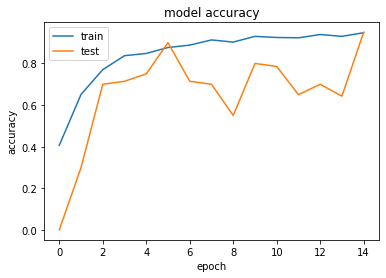

In [27]:
#summarize History
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

Text(0.5, 1.0, 'Loss Curves')

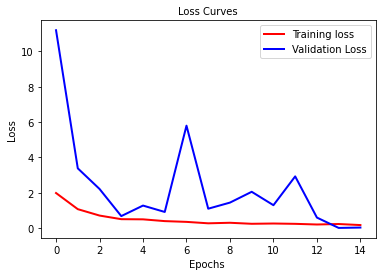

In [46]:
# Loss Curves
#plt.figure(figsize=[10,8])
plt.plot(history.history['loss'],'r',linewidth=2.0)
plt.plot(history.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=10)
#plt.grid()
plt.xlabel('Epochs ',fontsize=10)
plt.ylabel('Loss',fontsize=10)
plt.title('Loss Curves',fontsize=10)
 


In [ ]:
model.save_weights('cnn_weights.h5')
newmodel.load_weights('cnn_weights.h5')
pred=newmodel.predict_generator(test_generator,steps=1821)